### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.set_option('display.max_columns', None)

### **Завдання 1**. Load the data
Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [2]:
data = pd.read_csv('./data/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset consist of 2240 rows and 29 columns with missing values only in `Income` column. 

It includes 26 numeric and 3 categorical columns.

### **Завдання 2.** Fill missing values
Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [4]:
print(f"There are {data['Income'].isnull().sum()} missing values")

print(f"The percent of missing values: {data['Income'].isnull().sum()/data.shape[0]*100:.2f}")

There are 24 missing values
The percent of missing values: 1.07


There are only 24 missing values in this column, accounting for approximately 1% of the entire data. Let's examine the distribution of this feature for determine the best approach for handling missing values. 

In [5]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [6]:
print(f"Most frequent value: {data['Income'].mode()[0]}")

Most frequent value: 7500.0


- The mean (52247) and median (51381.5) are quit close, suggesting a fairly symmetric distribution.
- However, the mode (7500) is significantly lower, indicating a right-skewed distribution with outliers. 

**Handling Missing Values:**
1. Imputing with the Most Frequent Value (Mode - 7500): Since missing values make up only 1.07% of the data, imputing with the mode is a reasonable approach. This ensures minimal distortion while maintaining all data points.
2. Dropping Rows with Missing Values: Removing these rows would lead to a loss of valuable client information. Given the small percentage of missing values, imputation is a better choice.

Thus, imputing with the mode (7500) is preferred to avoid bias and retain all available data.

In [7]:
data['Income'] = data['Income'].fillna(data['Income'].mode()[0])

### **Завдання 3.** Categorical and Date columns
У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [8]:
data.select_dtypes('object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


Dataset include two categorical column `Education` and `Marital_Status` and one column with data `Dt_Customer`.

In [9]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [10]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

We can apply One-Hot Encoding to these categorical columns. 

For `Marital_Status`, three rare categories (`Alone`, `Absurd`, and `YOLO`) can be combines into a single category, `Alone`, to reduce sparsity.

#### `Education`

In [11]:
education_enc = pd.get_dummies(data['Education'], prefix='Education', dtype='int')
education_enc.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


#### `Marital_Status`

In [12]:
data['Marital_Status'].map(
    lambda x: 'Alone' if x in ['Alone', 'Absurd', 'YOLO'] else x
).value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         7
Name: count, dtype: int64

In [13]:
marital_status_enc = pd.get_dummies(
    data['Marital_Status'].map(lambda x: 'Alone' if x in ['Alone', 'Absurd', 'YOLO'] else x),
    prefix='Marital_Status',
    dtype='int'
)

marital_status_enc.head(5)

,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [14]:
data = pd.concat([data, education_enc, marital_status_enc], axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,0,1,0,0,0,0,0,1,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,0,1,0,0,0,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,0,1,0,0,0,0,0,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,0,1,0,0,0,0,0,0,1,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,0,0,0,1,0,0,1,0,0,0


#### `Dt_Customer`

Let's create separate columns for month and day from the `Dt_Customer' column for additional information about trend in registration date.

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

In [16]:
data['Dt_Customer_Day'] = data['Dt_Customer'].dt.day
data['Dt_Customer_Month'] = data['Dt_Customer'].dt.month

In [17]:
data[['Dt_Customer_Day', 'Dt_Customer_Month']].head()

,Dt_Customer_Day,Dt_Customer_Month
0,4,9
1,8,3
2,21,8
3,10,2
4,19,1


Let's create additional column with information about customer lifespan.

In [18]:
last_date = data['Dt_Customer'].max()
last_date

Timestamp('2014-06-29 00:00:00')

In [19]:
data['Customer_Lifespan'] = (last_date - data['Dt_Customer']).dt.days

#### `Year_Birth`

Let's create column with information about customer's age

In [20]:
data['Dt_Customer'].dt.year.max()

2014

In [21]:
data['Age'] = data['Dt_Customer'].dt.year.max() - data['Year_Birth']

### **Завдання 4**. K-Means
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [22]:
X = data.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [24]:
pd.Series(cluster_labels).value_counts()

0    831
2    781
1    628
Name: count, dtype: int64

In [25]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Mean value silhouette_score: {silhouette_avg:.4f}")

Mean value silhouette_score: 0.5313


In [26]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)

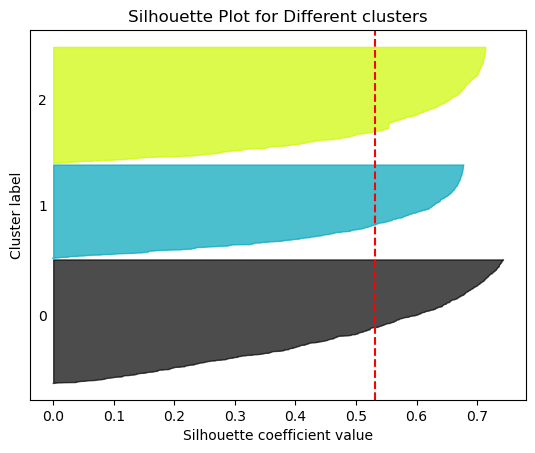

In [27]:
n_clusters = 3
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    plt.text(-0.025, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.yticks([])
plt.axvline(x=silhouette_avg, color='r', linestyle='--')
plt.title('Silhouette Plot for Different clusters')
plt.xlabel('Silhouette coefficient value')
plt.ylabel('Cluster label')
plt.show()

### **Завдання 5.** Visualizing 
Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на характеристики про дохід користувачів і те, як вони взаємодіють з магазином (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

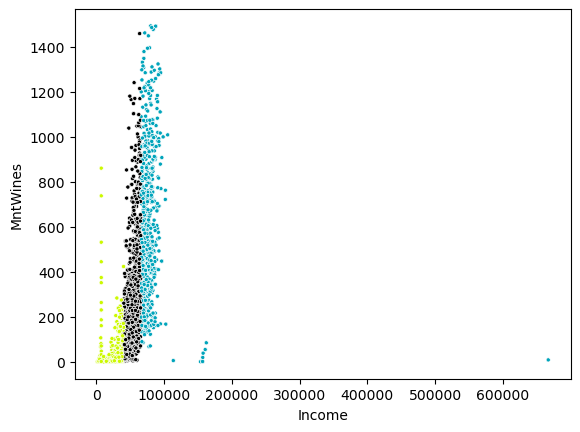

In [28]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
sns.scatterplot(
    x=X['Income'],
    y=X['MntWines'],
    marker='.',
    c=colors
)
plt.show()

In [ ]:
data['MntTotal'] = data[
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
     'MntSweetProducts', 'MntGoldProds']
].sum(axis=1)

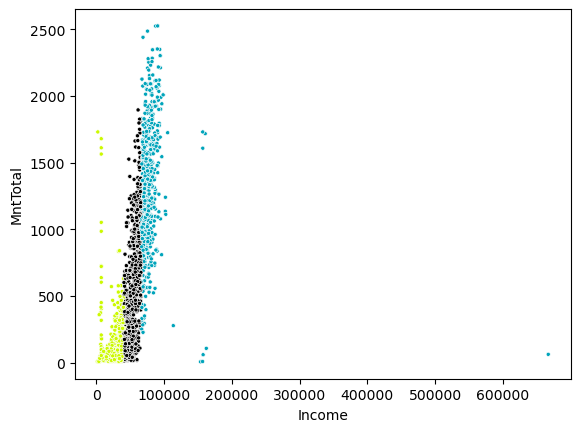

In [30]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
sns.scatterplot(data, x='Income', y='MntTotal', marker='.', c=colors)
plt.show()

In [31]:
data['NumPurchases'] = data[
    ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
].sum(axis=1)

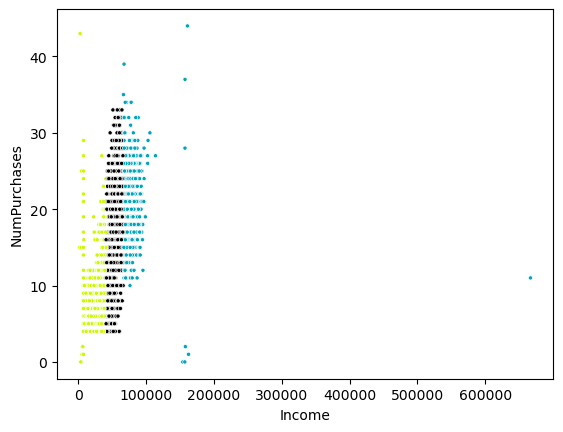

In [32]:
sns.scatterplot(data, x='Income', y='NumPurchases', marker='.', c=colors)
plt.show()

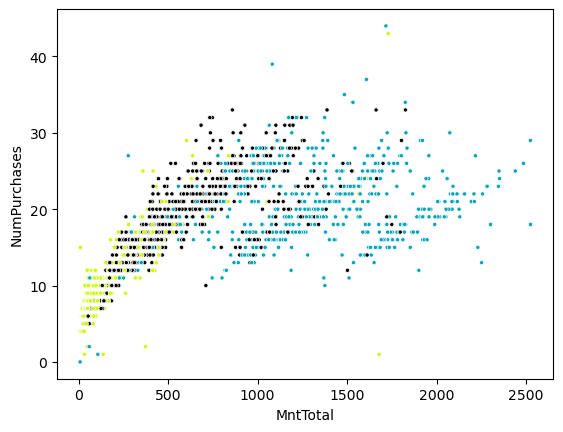

In [33]:
sns.scatterplot(data, x='MntTotal', y='NumPurchases', marker='.', c=colors)
plt.show()

In [34]:
fig = px.scatter_3d(data,
                    x='Income',
                    y='NumPurchases',
                    z='MntTotal',
                    color=cluster_labels)
fig.update_traces(marker_size=3)
fig.show()

It's seems that `Income` is the most important feature for clustering, with clusters forming based on income values. However, the presence of an outlier makes analysis more difficult, as it distors the scale of the plot. 

### **Завдання 6**. Scaling data
Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [35]:
scaler = StandardScaler().set_output(transform='pandas')

X_scaler = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaler)
display(pd.Series(cluster_labels).value_counts())

silhouette_avg = silhouette_score(X_scaler, cluster_labels)
print(f"Mean value silhouette_score: {silhouette_avg:.4f}")

0    1352
1     858
2      30
Name: count, dtype: int64

Mean value silhouette_score: 0.1651


In [36]:
fig = px.scatter_3d(x=X_scaler['Income'],
                    y=X_scaler['NumStorePurchases'],
                    z=X_scaler['MntMeatProducts'],
                    color=cluster_labels)
fig.update_traces(marker_size=3)
fig.show()

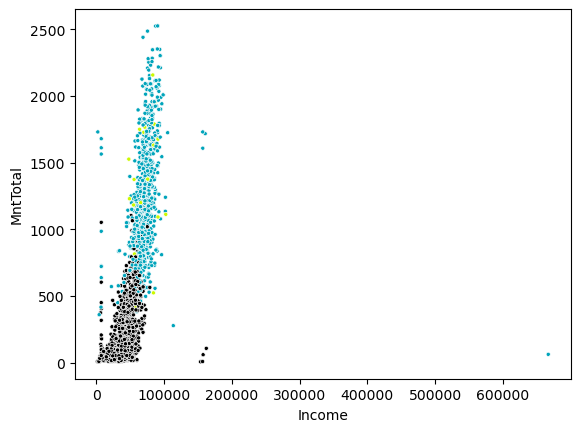

In [37]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
sns.scatterplot(data, x='Income', y='MntTotal', marker='.', c=colors)
plt.show()

After scaling we had worst clustering and significantly lower value of silhouette metric.

### **Завдання 7.** Outliers
З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [38]:
data.select_dtypes('number').describe().round(0)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Dt_Customer_Day,Dt_Customer_Month,Customer_Lifespan,Age,MntTotal,NumPurchases
count,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,1969.0,51768.0,0.0,1.0,49.0,304.0,26.0,167.0,38.0,27.0,44.0,2.0,4.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,6.0,354.0,45.0,606.0,15.0
std,3247.0,12.0,25458.0,1.0,1.0,29.0,337.0,40.0,226.0,55.0,41.0,52.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,202.0,12.0,602.0,8.0
min,0.0,1893.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18.0,5.0,0.0
25%,2828.0,1959.0,34722.0,0.0,0.0,24.0,24.0,1.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,181.0,37.0,69.0,8.0
50%,5458.0,1970.0,51075.0,0.0,0.0,49.0,174.0,8.0,67.0,12.0,8.0,24.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,6.0,356.0,44.0,396.0,15.0
75%,8428.0,1977.0,68290.0,1.0,1.0,74.0,504.0,33.0,232.0,50.0,33.0,56.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23.0,10.0,529.0,55.0,1046.0,21.0
max,11191.0,1996.0,666666.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31.0,12.0,699.0,121.0,2525.0,44.0


#### `Income`

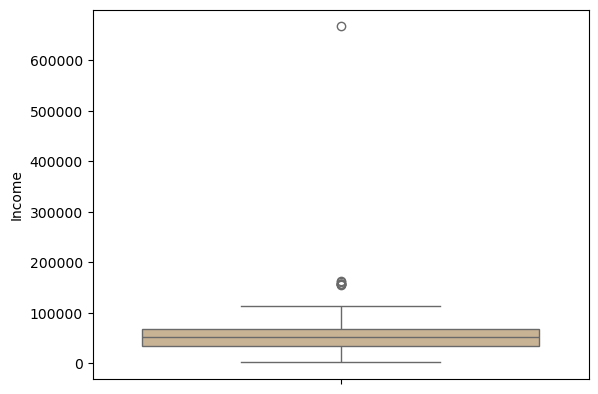

In [39]:
sns.boxplot(data['Income'], color='tan')
plt.show()

In [40]:
data.iloc[data['Income'].argmax(), :].to_frame().T

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Dt_Customer_Day,Dt_Customer_Month,Customer_Lifespan,Age,MntTotal,NumPurchases
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02 00:00:00,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,0,0,1,0,0,0,0,0,0,1,0,2,6,392,37,62,11


Having customers with such income likely results from data entry error. Let's replace this unrealistic values with the median value.

In [41]:
data.loc[data['Income'].argmax(), 'Income'] = data['Income'].median()

#### Analyze outliers

In [42]:
def outlier_range(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = (Q1 - 1.5 * IQR)
    max_value = (Q3 + 1.5 * IQR)
    num_outliers = ((df[column] < min_value) | (df[column] > max_value)).sum()
    return min_value, max_value, num_outliers

In [ ]:
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth', 'Age', 'MntTotal', 'NumPurchases']

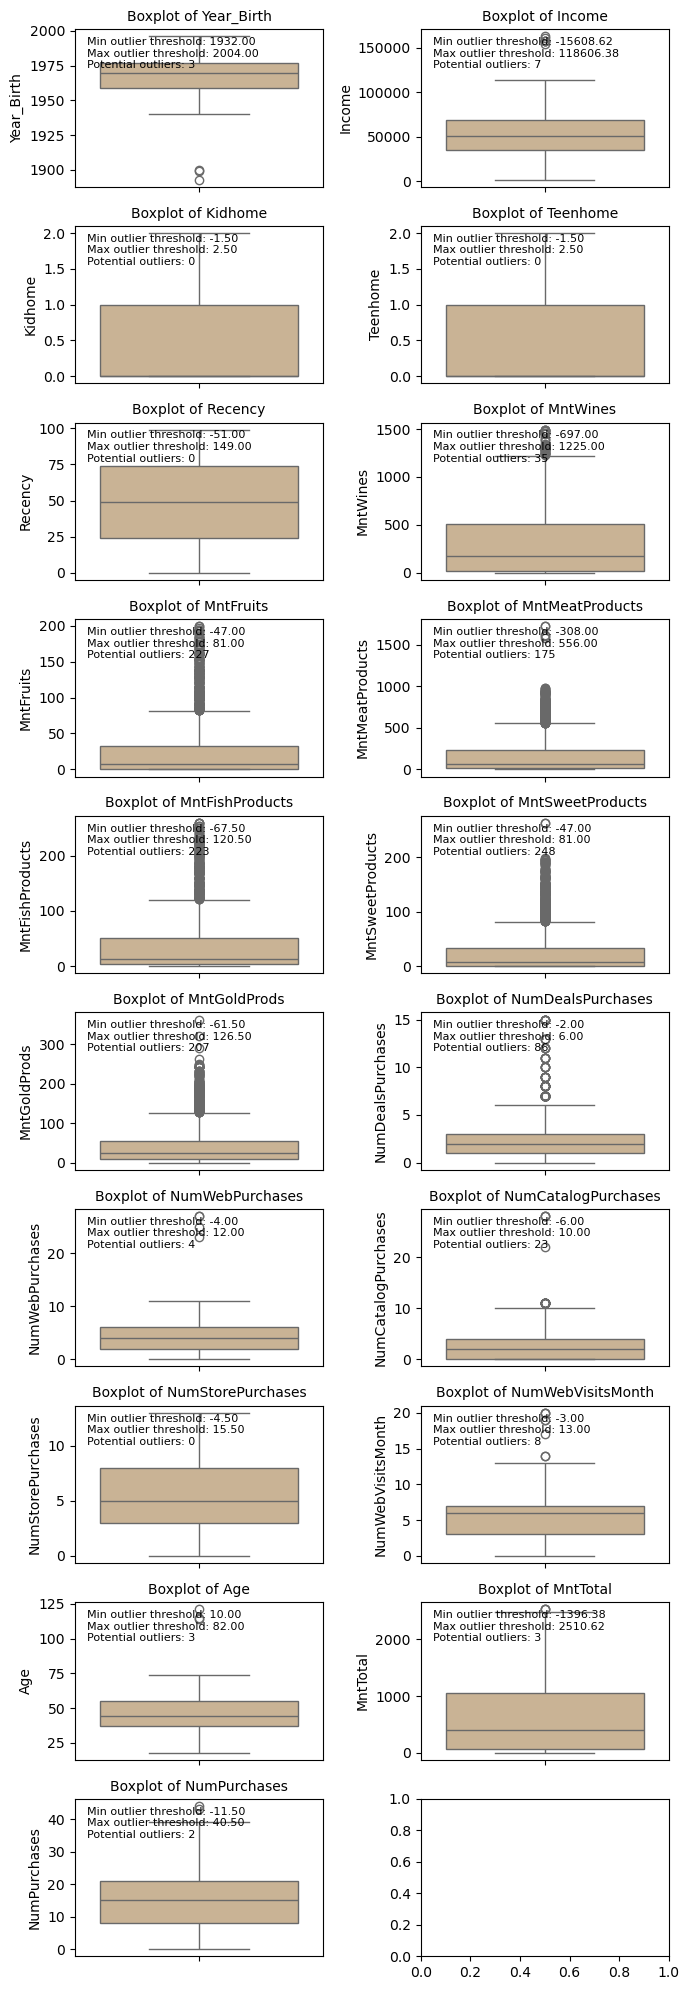

In [44]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(7, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    min_value, max_value, num_outliers = outlier_range(data, col)

    sns.boxplot(y=data[col], ax=axes[i], color='tan')
    axes[i].set_title(f"Boxplot of {col}", fontsize=10)
    axes[i].set_xlabel("")

    # Add text with outlier information
    text = (f"Min outlier threshold: {min_value:.2f}\n"
            f"Max outlier threshold: {max_value:.2f}\n"
            f"Potential outliers: {num_outliers}")

    axes[i].text(0.05, 0.95, text,
                 transform=axes[i].transAxes,
                 fontsize=8,
                 verticalalignment='top')

plt.tight_layout()
plt.show()

We have unrealistic values in the `Year_Birth` column and possibly some outliers in other columns as well. 

#### `Year_Birth`

In [45]:
data['Year_Birth'].value_counts().sort_index()[:5]

Year_Birth
1893    1
1899    1
1900    1
1940    1
1941    1
Name: count, dtype: int64

In [46]:
data[data.Year_Birth.isin([1893, 1899, 1900])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Dt_Customer_Day,Dt_Customer_Month,Customer_Lifespan,Age,MntTotal,NumPurchases
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,1,0,0,0,0,0,1,0,0,0,0,26,9,276,114,65,6
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,1,0,0,0,0,0,0,0,1,0,0,17,5,43,121,22,4
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,0,0,0,0,1,0,0,0,0,1,0,26,9,276,115,1853,15


In [47]:
data['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [48]:
mode_year = data['Year_Birth'].mode()[0]
mode_year

1976

Having customers with birth years like 1893, 1899, and 1900 (age > 100) is unusual and likely results from data entry errors, maybe a birth year was entered incorrectly. Looking at the other fields, the data seems somewhat reasonable.

Handle the Outliers:
- Remove them, as they are clearly errors and too few to affect the dataset significantly.
- Impute unrealistic values by replacing with the median or the mode (most frequent) birth year of the dataset.

Let's replace unrealistic values with the mode.

In [49]:
data.loc[data["Year_Birth"] < 1920, "Year_Birth"] = mode_year

In [50]:
data['Age'] = data['Dt_Customer'].dt.year.max() - data['Year_Birth']

#### Clustering without outliers

In [51]:
X = data.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status',
                       'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Mean value silhouette_score: {silhouette_avg:.4f}")

Mean value silhouette_score: 0.6076


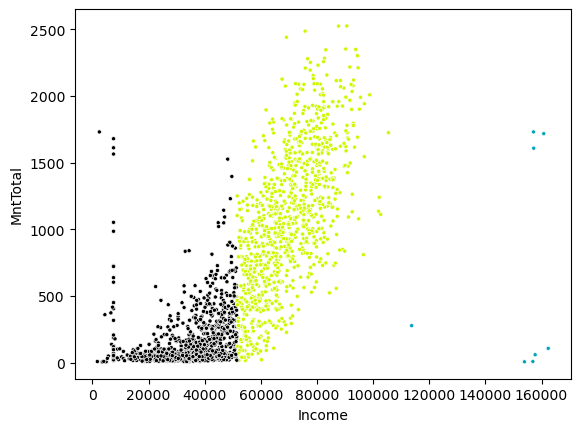

In [53]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
sns.scatterplot(
    x=X['Income'],
    y=X['MntTotal'],
    marker='.',
    c=colors
)
plt.show()

In [54]:
scaler = StandardScaler().set_output(transform='pandas')

X_scaler = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaler)

silhouette_avg = silhouette_score(X_scaler, cluster_labels)
print(f"Mean value silhouette_score: {silhouette_avg:.4f}")

Mean value silhouette_score: 0.1826


After drop outlier in `Income` we obtained a higher silhouette score without scaling the data and after scaling.

#### Another approach to dropping the outliers

In [55]:
income_max_value = outlier_range(data, 'Income')[1]

In [56]:
data_two = data[data['Income'] < income_max_value].copy()
X_two = data_two.drop(columns=['ID', 'Year_Birth', 'Education', 'Marital_Status',
                               'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_two)

silhouette_avg = silhouette_score(X_two, cluster_labels)
print(f"Mean value silhouette_score: {silhouette_avg:.4f}")

Mean value silhouette_score: 0.5443


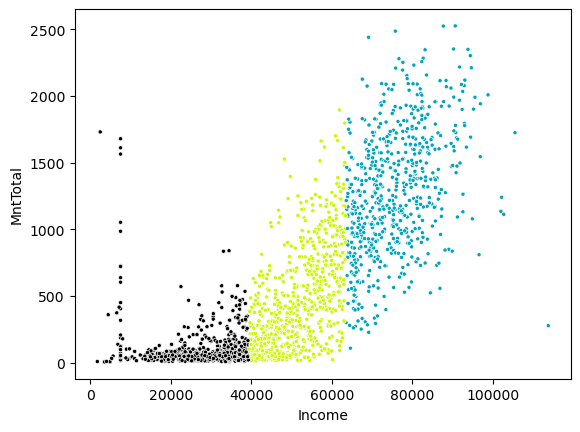

In [58]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
sns.scatterplot(
    x=X_two['Income'],
    y=X_two['MntTotal'],
    marker='.',
    c=colors
)
plt.show()

We obtained worst silhouette score with such approach to remove outliers.

### **Завдання 8.** Elbow method
Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

In [147]:
def elbow_method(X, K):
    sum_of_squared_distances = []

    for k in K:
        model = KMeans(n_clusters=k, random_state=42).fit(X)
        sum_of_squared_distances.append(model.inertia_)

    plt.plot(K, sum_of_squared_distances, '<-', color='tan')
    plt.xlabel('K values')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method')
    plt.show()

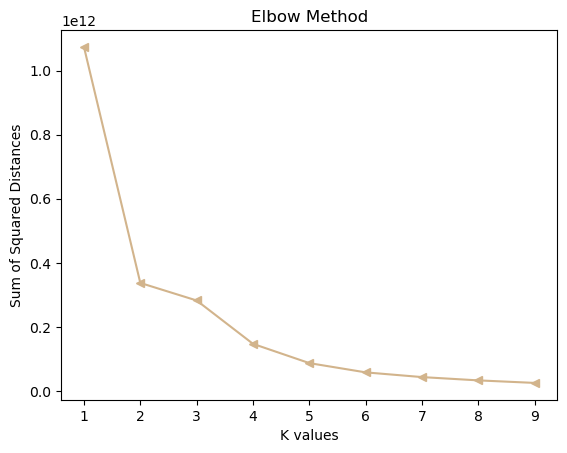

In [148]:
K = range(1, 10)

elbow_method(X, K)

The optimum number of clusters is 4 or maybe 5.

In [ ]:
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For {k} clusters mean value of silhouette score is: {silhouette_avg:.4f}")

For 3 clusters mean value of silhouette score is: 0.6076
For 4 clusters mean value of silhouette score is: 0.5446
For 5 clusters mean value of silhouette score is: 0.5341


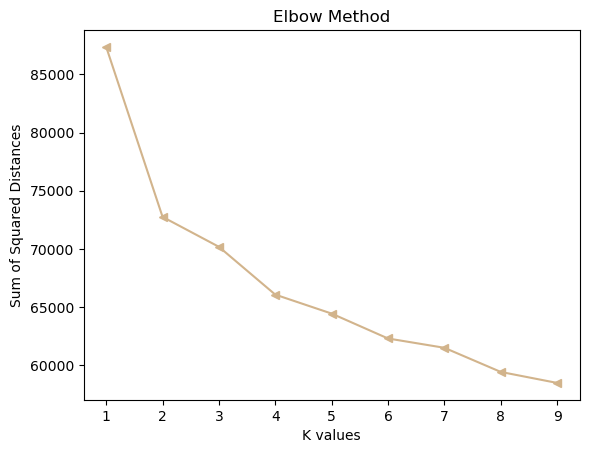

In [ ]:
K = range(1, 10)
elbow_method(X_scaler, K)

If we scale the input data, 4 clusters also might be a better choice.

In [ ]:
for k in [3, 4, 6, 8]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaler)

    silhouette_avg = silhouette_score(X_scaler, cluster_labels)
    print(f"For {k} clusters mean value of silhouette score is: {silhouette_avg:.4f}")

For 3 clusters mean value of silhouette score is: 0.1826
For 4 clusters mean value of silhouette score is: 0.1215
For 6 clusters mean value of silhouette score is: 0.0609
For 8 clusters mean value of silhouette score is: 0.0762


But silhouette score still higher for 3 clusters.

### **Завдання 9.** Agglomerative Hierarchical Clustering
Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте метрику силуету для цього методу кластеризації.

In [59]:
def get_dendrogram(dist):
    plt.figure(figsize=(18, 6))
    dendrogram(dist, leaf_rotation=90, truncate_mode='lastp')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.title('Dendrogram Single Method')
    plt.show()

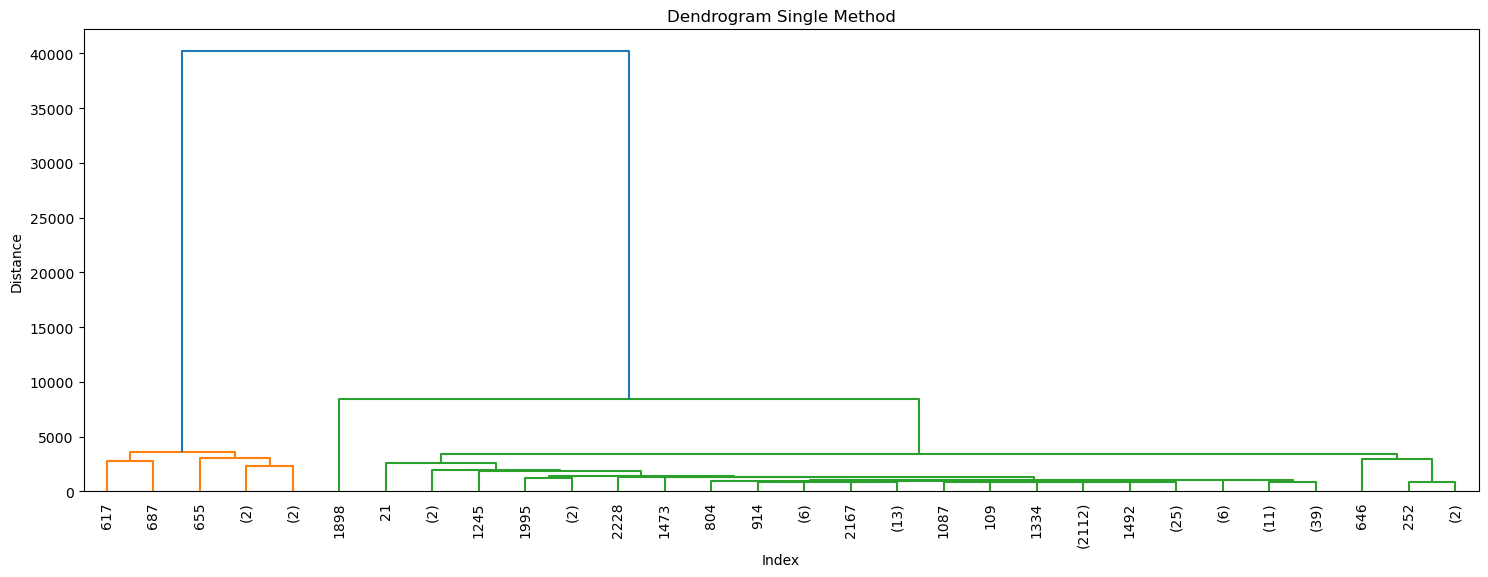

In [60]:
dist_sin = linkage(X, method='single')
get_dendrogram(dist_sin)

It seems like there are three cluster, but they are not evenly distributed: the first cluster has only one element, the second has more elements, and the third is the largest.

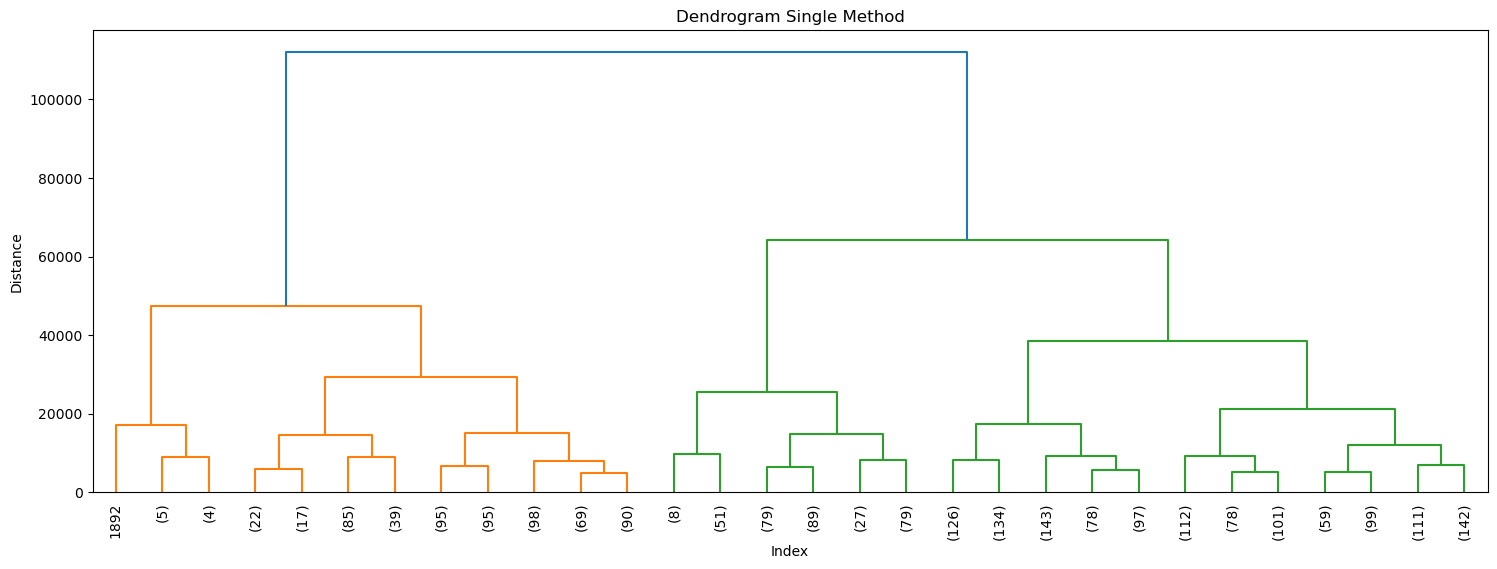

In [61]:
dist_comp_two = linkage(X_two, method="complete")
get_dendrogram(dist_comp_two)

For the dataset with another approach to drop outliers, the dendrogram appears more suitable.

In [62]:
data_two['2_clust'] = fcluster(dist_comp_two, 2, criterion='maxclust')
data_two['3_clust'] = fcluster(dist_comp_two, 3, criterion='maxclust')

In [63]:
data_two['2_clust'].value_counts()

2_clust
2    1613
1     620
Name: count, dtype: int64

In [64]:
data_two['3_clust'].value_counts()

3_clust
3    1280
1     620
2     333
Name: count, dtype: int64

In [ ]:
def visualize_clusters(df, title, hue_1, hue_2):
    plt.suptitle(title, fontsize=14)
    plt.subplot(2, 1, 1)
    plt.title(hue_1)
    sns.scatterplot(
        data=df,
        x='Income',
        y='MntTotal',
        hue=hue_1,
        s=10,
        palette='Set2'
    )

    plt.subplot(2, 1, 2)
    plt.title(hue_2)
    sns.scatterplot(
        data=df,
        x='Income',
        y='MntTotal',
        hue=hue_2,
        s=10,
        palette='Set2'
    )

    plt.tight_layout()
    plt.show()

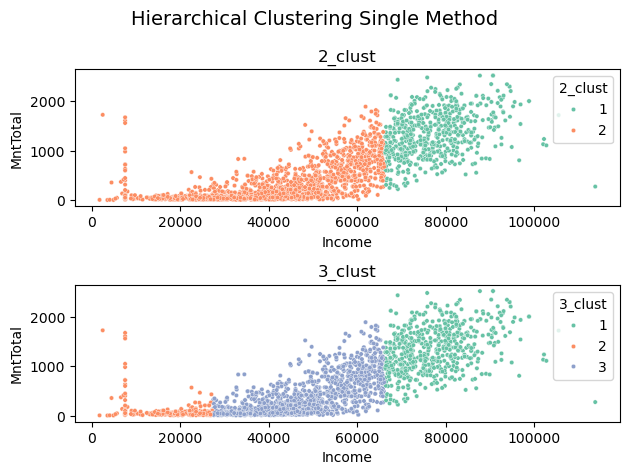

In [66]:
visualize_clusters(data_two, 'Hierarchical Clustering Single Method', '2_clust', '3_clust')

In [ ]:
silhouette_avg = silhouette_score(X_two, data_two['2_clust'])
print(f"For 2 clusters mean value of silhouette score is: {silhouette_avg:.4f}")

silhouette_avg = silhouette_score(X_two, data_two['3_clust'])
print(f"For 3 clusters mean value of silhouette score is: {silhouette_avg:.4f}")

For 2 clusters mean value of silhouette score is: 0.5097
For 3 clusters mean value of silhouette score is: 0.4532


We didn't obtain better result of silhouette score.

## **Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте метрику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

#### Complete Method of Agglomerative Hierarchical Clustering 

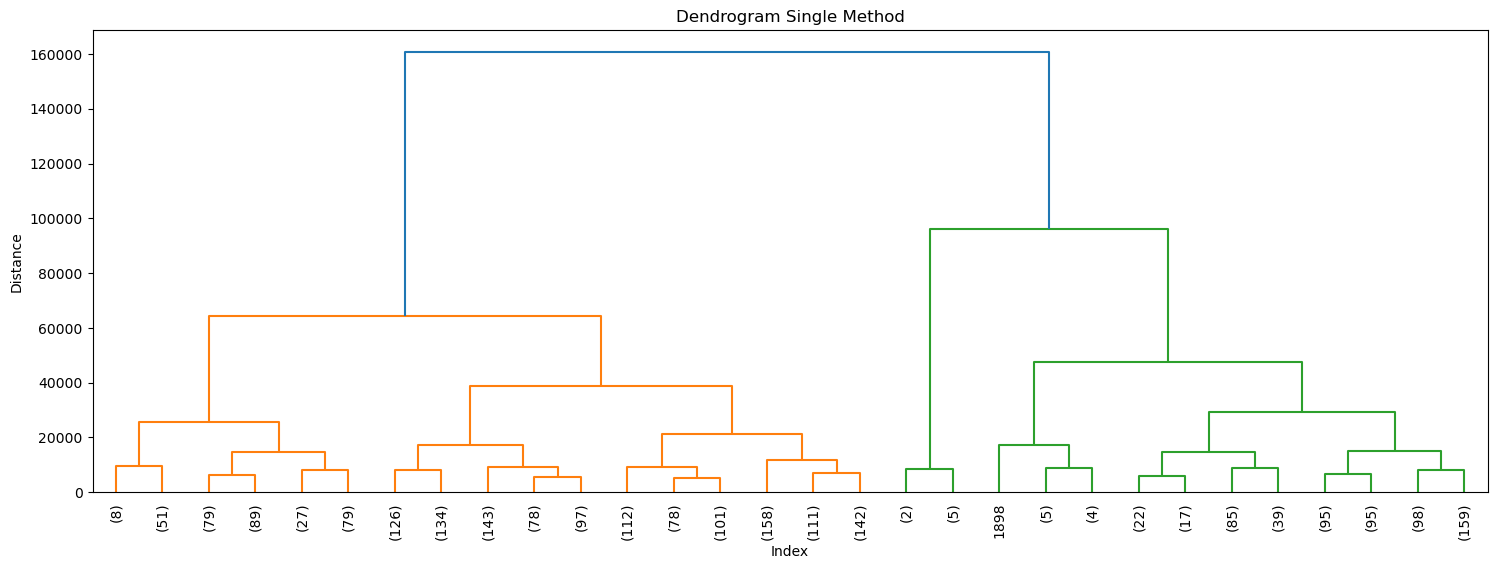

In [68]:
dist_comp = linkage(X, method="complete")

get_dendrogram(dist_comp)

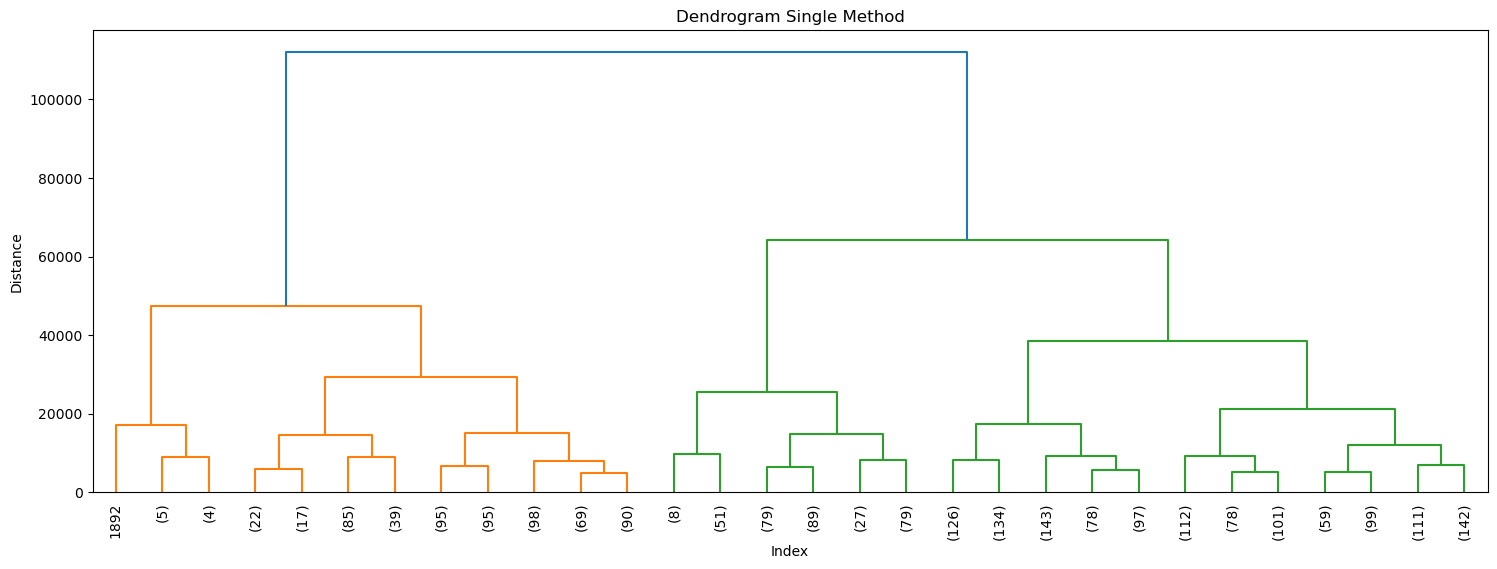

In [69]:
dist_comp_two = linkage(X_two, method="complete")

get_dendrogram(dist_comp_two)

Hierarchical clustering performs better when more outliers are removed.

In [70]:
data_two['2_clust_CM'] = fcluster(dist_comp_two, 2, criterion='maxclust')
data_two['3_clust_CM'] = fcluster(dist_comp_two, 3, criterion='maxclust')
data_two['4_clust_CM'] = fcluster(dist_comp_two, 4, criterion='maxclust')

In [72]:
for k in [2, 3, 4]:
    silhouette_avg = silhouette_score(X_two, data_two[f'{k}_clust_CM'])
    print(f"For {k} clusters mean value of silhouette score is: {silhouette_avg:.4f}")

For 2 clusters mean value of silhouette score is: 0.5097
For 3 clusters mean value of silhouette score is: 0.4532
For 4 clusters mean value of silhouette score is: 0.4126


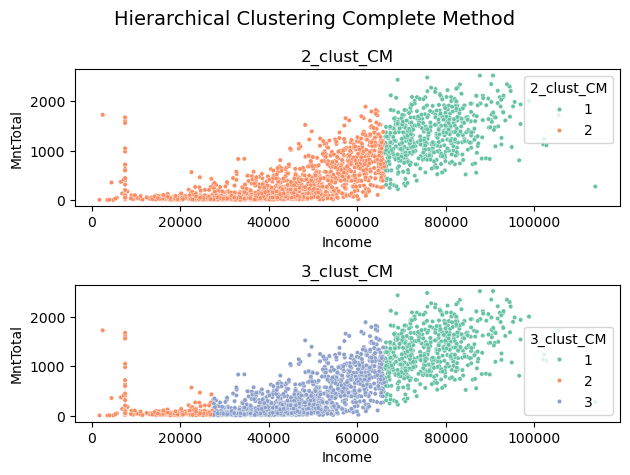

In [74]:
visualize_clusters(data_two, 'Hierarchical Clustering Complete Method', '2_clust_CM', '3_clust_CM')

#### Ward Method of Hierarchical Clustering 

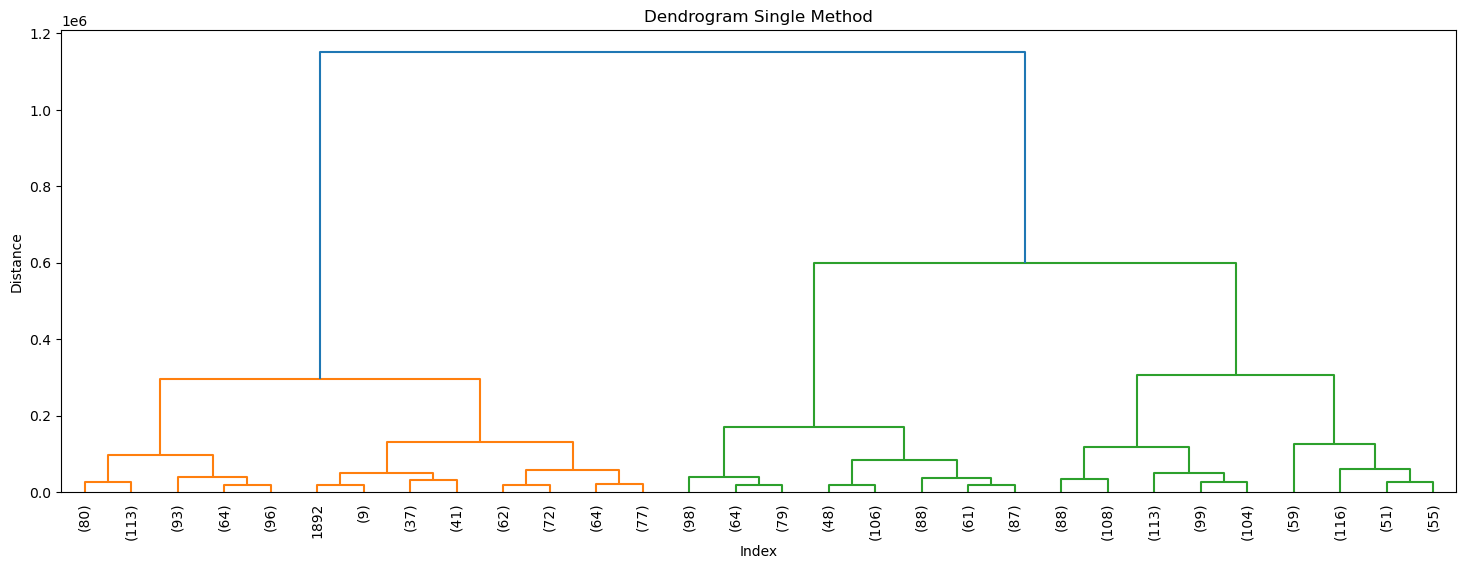

In [77]:
dist_ward = linkage(X_two, method="ward")
get_dendrogram(dist_ward)

In [78]:
data_two['2_clust_WM'] = fcluster(dist_ward, 2, criterion='maxclust')
data_two['3_clust_WM'] = fcluster(dist_ward, 3, criterion='maxclust')

In [79]:
for k in [2, 3]:
    silhouette_avg = silhouette_score(X_two, data_two[f'{k}_clust_WM'])
    print(f"For {k} clusters mean value of silhouette score is: {silhouette_avg:.4f}")

For 2 clusters mean value of silhouette score is: 0.5678
For 3 clusters mean value of silhouette score is: 0.5291


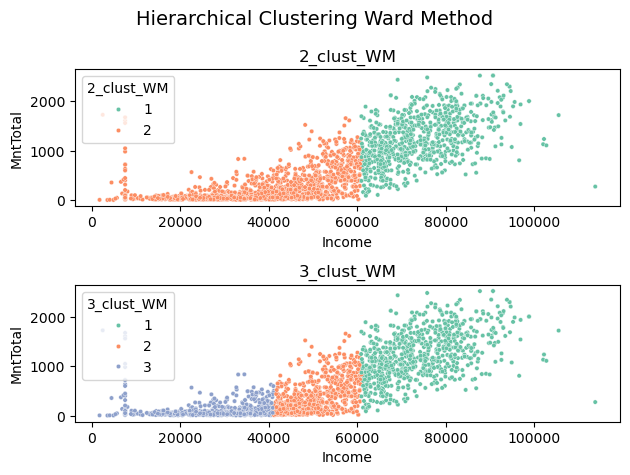

In [82]:
visualize_clusters(data_two, 'Hierarchical Clustering Ward Method', '2_clust_WM', '3_clust_WM')

#### DBSCAN

In [83]:
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X_scaler)
labels_dbscan = dbscan.labels_

print(f"Estimated number of clusters: {max(labels_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_dbscan).count(-1)}")
print("Distribution of predicted clusters:")
display(pd.Series(labels_dbscan).value_counts())

Estimated number of clusters: 3
Estimated number of noise points: 5
Distribution of predicted clusters:


 0    2207
 1      21
 2       7
-1       5
Name: count, dtype: int64

In [91]:
scaler = StandardScaler().set_output(transform='pandas')

X_two_scaler = scaler.fit_transform(X_two)

dbscan = DBSCAN(eps=10, min_samples=7)
dbscan.fit(X_two_scaler)
labels_dbscan = dbscan.labels_

print(f"Estimated number of clusters: {max(labels_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_dbscan).count(-1)}")
print("Distribution of predicted clusters:")
display(pd.Series(labels_dbscan).value_counts())

Estimated number of clusters: 3
Estimated number of noise points: 2
Distribution of predicted clusters:


 0    2203
 1      21
 2       7
-1       2
Name: count, dtype: int64

It seems than DBSCAN not suitable in this case. 

#### GaussianMixture

Distribution of predicted clusters:


2    1028
0     942
1     270
Name: count, dtype: int64

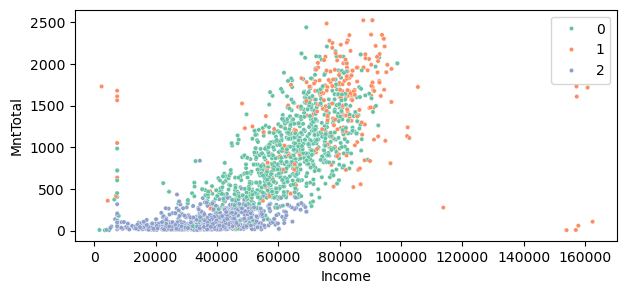

In [92]:
gm = GaussianMixture(n_components=3, random_state=24)
gm_labels = gm.fit_predict(X)

print("Distribution of predicted clusters:")
display(pd.Series(gm_labels).value_counts())

plt.figure(figsize=(7, 3))
sns.scatterplot(
        x=X['Income'],
        y=X['MntTotal'],
        hue=gm_labels,
        s=10,
        palette='Set2'
)

plt.show()

Distribution of predicted clusters:


2    1244
0     730
1     259
Name: count, dtype: int64

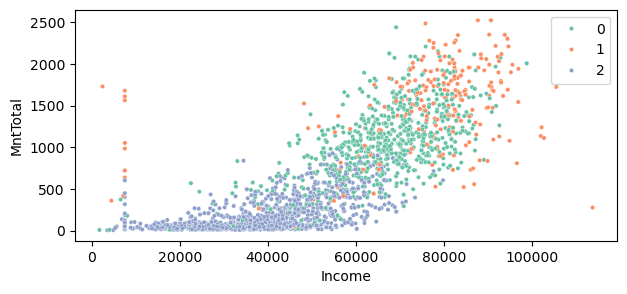

In [98]:
gm = GaussianMixture(n_components=3, random_state=24)
gm_labels = gm.fit_predict(X_two)

print("Distribution of predicted clusters:")
display(pd.Series(gm_labels).value_counts())

plt.figure(figsize=(7, 3))
sns.scatterplot(
        x=X_two['Income'],
        y=X_two['MntTotal'],
        hue=gm_labels,
        s=10,
        palette='Set2'
)

plt.show()

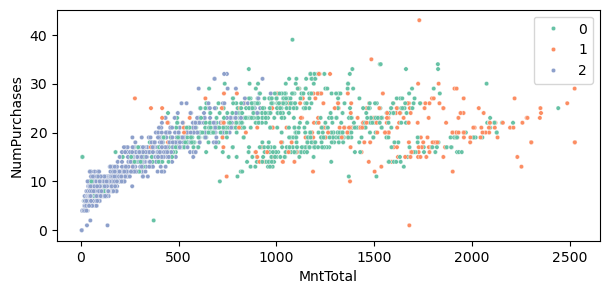

In [99]:
plt.figure(figsize=(7, 3))
sns.scatterplot(
        x=X_two['MntTotal'],
        y=X_two['NumPurchases'],
        hue=gm_labels,
        s=10,
        palette='Set2'
)

plt.show()

#### AgglomerativeClustering

Distribution of predicted clusters:


1    809
0    793
2    631
Name: count, dtype: int64

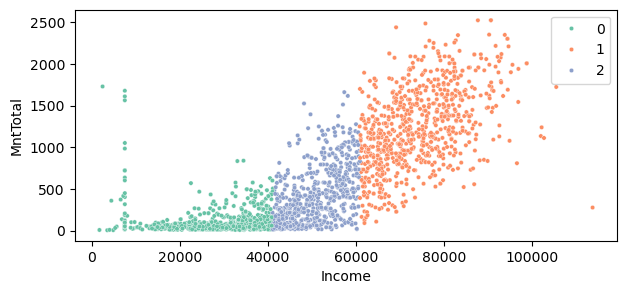

In [102]:
agglom = AgglomerativeClustering(n_clusters=3)
agglom_labels = agglom.fit_predict(X_two)

print("Distribution of predicted clusters:")
display(pd.Series(agglom_labels).value_counts())

plt.figure(figsize=(7, 3))
sns.scatterplot(
        x=X_two['Income'],
        y=X_two['MntTotal'],
        hue=agglom_labels,
        s=10,
        palette='Set2'
)

plt.show()

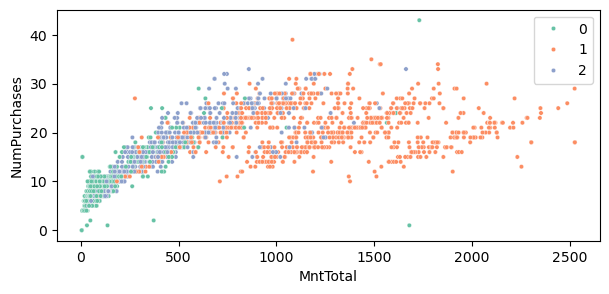

In [110]:
plt.figure(figsize=(7, 3))
sns.scatterplot(
        x=X_two['MntTotal'],
        y=X_two['NumPurchases'],
        hue=agglom_labels,
        s=10,
        palette='Set2'
)

plt.show()

In my opinion, Gaussian Mixture or Agglomerative Hierarchical Clustering with Ward linkage provide better clustering results.

A higher silhouette score doesn't necessarily indicate the most meaningful or effective clustering. 